🎯 المقدمة

في عالم معالجة الصور والرؤية الحاسوبية، تبرز مكتبتان أساسيتان في بايثون: OpenCV و scikit-image (skimage). لكل منهما فلسفة تصميم مختلفة واستخدامات مميزة. في هذا الدفتر، سنقوم بمقارنة عملية بينهما من خلال تطبيق عمليات معالجة صور أساسية باستخدام كلتا المكتبتين.

📊 جدول المقارنة النظري

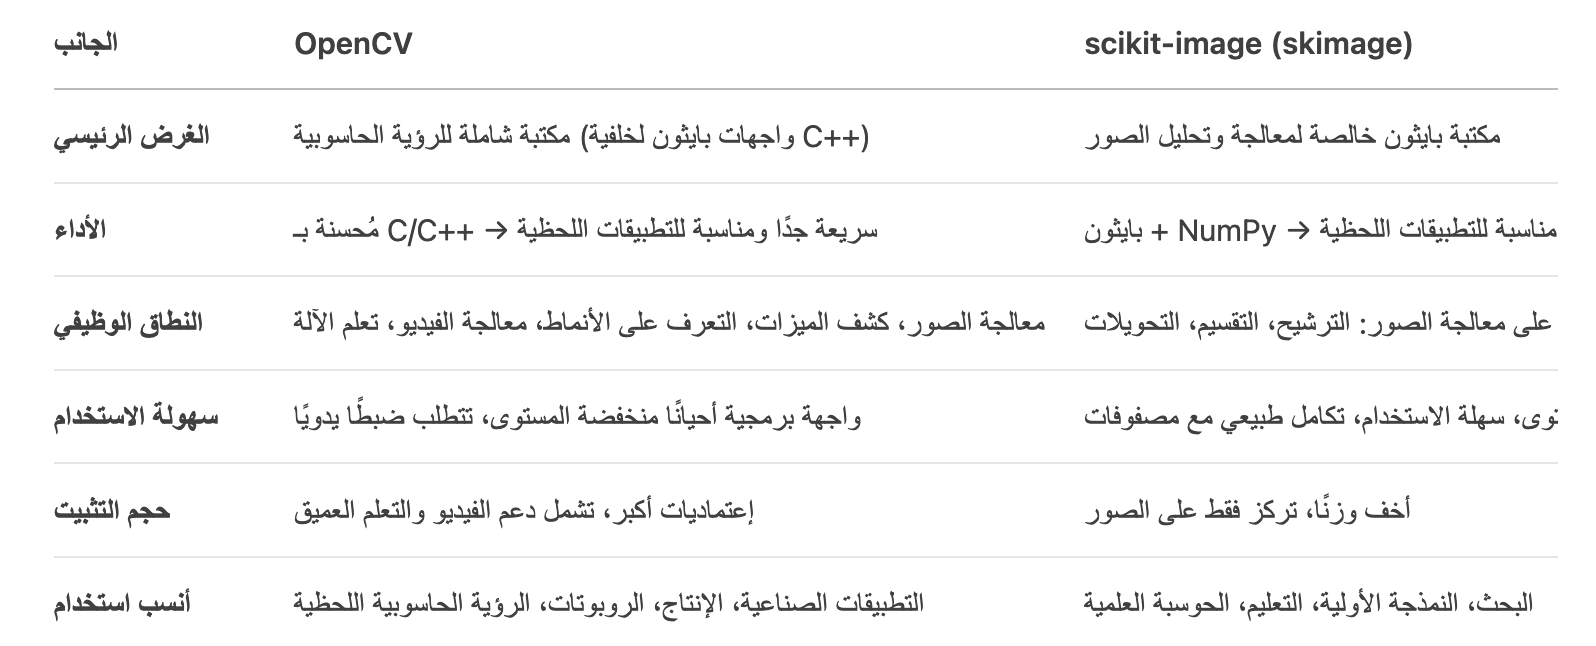

🧪 التطبيق العملي

1. تحميل المكتبات والصورة

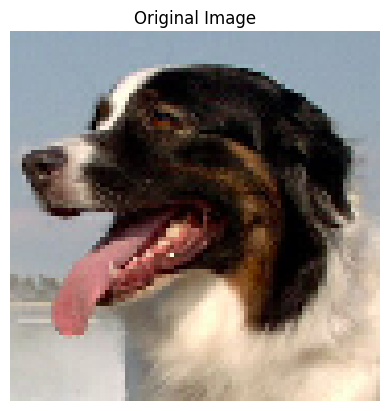

In [ ]:
# استيراد المكتبات الأساسية
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# تحميل الصورة من مصدر عبر الإنترنت
img_url = "https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png"
img = io.imread(img_url)

# عرض الصورة الأصلية
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title("الصورة الأصلية")
plt.axis("off")
plt.show()

2. التحويل إلى التدرج الرمادي

In [ ]:
# التحويل إلى التدرج الرمادي باستخدام OpenCV
gray_cv = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# التحويل إلى التدرج الرمادي باستخدام scikit-image
gray_sk = color.rgb2gray(img)  # الناتج يكون من نوع float في المدى [0,1]

# عرض النتائج جنبًا إلى جنب
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("الصورة الأصلية")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_cv, cmap='gray')
plt.title("OpenCV - التدرج الرمادي")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_sk, cmap='gray')
plt.title("scikit-image - التدرج الرمادي")
plt.axis('off')

plt.tight_layout()
plt.show()

3. كشف الحواف

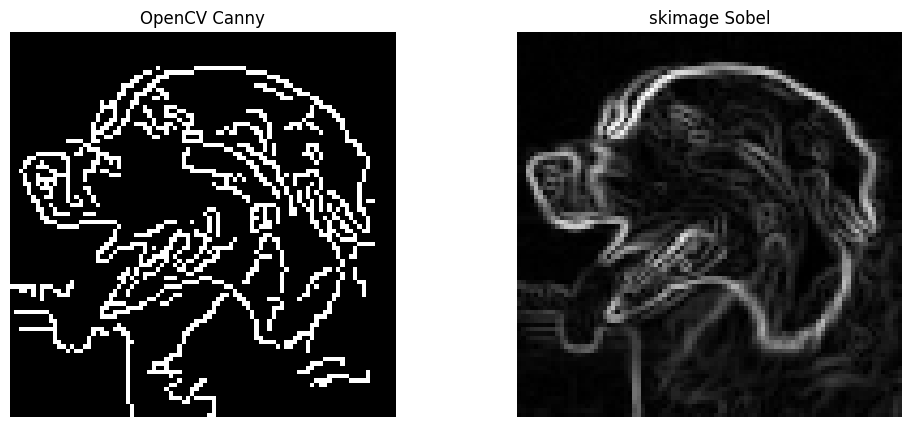

In [ ]:
# كشف الحواف باستخدام OpenCV (كاشف كاني)
edges_cv = cv2.Canny(gray_cv, 100, 200)

# كشف الحواف باستخدام scikit-image (مرشح سوبل)
edges_sk = filters.sobel(gray_sk)

# عرض النتائج جنبًا إلى جنب
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("الصورة الأصلية")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges_cv, cmap='gray')
plt.title("OpenCV - كاشف كاني للحواف")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_sk, cmap='gray')
plt.title("scikit-image - مرشح سوبل للحواف")
plt.axis('off')

plt.tight_layout()
plt.show()

4. العتبة (Thresholding)

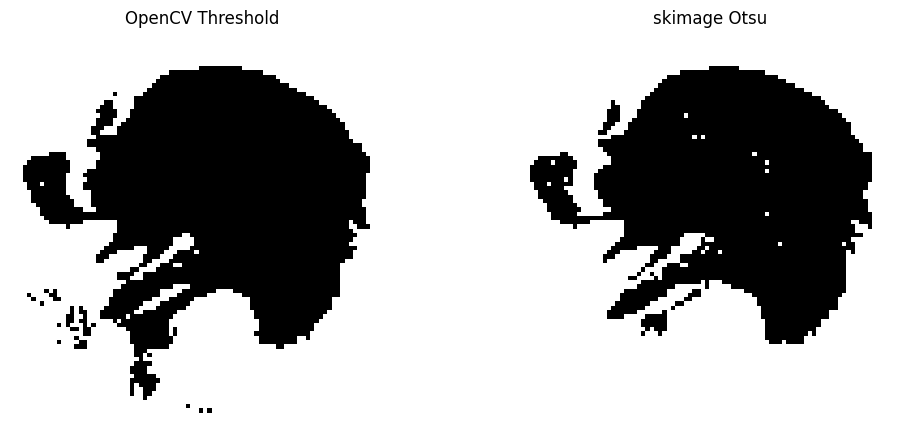

In [ ]:
# العتبة باستخدام OpenCV
_, th_cv = cv2.threshold(gray_cv, 128, 255, cv2.THRESH_BINARY)

# العتبة باستخدام scikit-image (طريقة أوتسو)
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(gray_sk)
th_sk = gray_sk > thresh_val

# عرض النتائج جنبًا إلى جنب
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("الصورة الأصلية")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(th_cv, cmap='gray')
plt.title("OpenCV - العتبة الثابتة")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(th_sk, cmap='gray')
plt.title("scikit-image - عتبة أوتسو التكيفية")
plt.axis('off')

plt.tight_layout()
plt.show()

📈 تحليل الأداء

import time

# قياس وقت التنفيذ للعمليات المختلفة
operations = {
    "التدرج الرمادي (OpenCV)": lambda: cv2.cvtColor(img, cv2.COLOR_RGB2GRAY),
    "التدرج الرمادي (skimage)": lambda: color.rgb2gray(img),
    "كشف الحواف (OpenCV)": lambda: cv2.Canny(gray_cv, 100, 200),
    "كشف الحواف (skimage)": lambda: filters.sobel(gray_sk),
}

results = {}
for op_name, op_func in operations.items():
    start_time = time.time()
    for _ in range(100):  # تكرار العملية 100 مرة للحصول على وقت دقيق
        result = op_func()
    end_time = time.time()
    results[op_name] = (end_time - start_time) / 100

# عرض نتائج قياس الأداء
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('مقارنة أداء OpenCV و scikit-image')
plt.xlabel('العملية')
plt.ylabel('الوقت (بالثواني)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("نتائج قياس الأداء (متوسط الوقت لكل عملية):")
for op_name, op_time in results.items():
    print(f"{op_name}: {op_time:.6f} ثانية")

💡 الخلاصة والتوصيات
متى تستخدم كل مكتبة؟

    استخدم OpenCV عندما:

        تحتاج إلى أداء عالي وسرعة في التنفيذ

        تعمل على تطبيقات إنتاجية أو أنظمة مضمنة

        تحتاج إلى وظائف متقدمة مثل معالجة الفيديو أو التعلم العميق

        تعمل على مشاريع الرؤية الحاسوبية الكاملة

    استخدم scikit-image عندما:

        تقوم بأبحاث أو نمذجة أولية

        تحتاج إلى خوارزميات متقدمة في معالجة الصور

        تفضل واجهة برمجية سهلة وبسيطة

        تعمل في بيئة تعليمية أو أكاديمية

التكامل بين المكتبتين

في العديد من المشاريع، يمكنك الاستفادة من قوة المكتبتين معًا:

    استخدام OpenCV للمهام التي تتطلب أداءً عاليًا

    استخدام scikit-image للخوارزميات المتخصصة في معالجة الصور

In [ ]:
# مثال على التكامل بين المكتبتين
def enhanced_edge_detection(image):
    # استخدام OpenCV للمعالجة الأولية السريعة
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # استخدام scikit-image للكشف المتقدم للحواف
    edges = filters.sobel(blurred)

    return edges

# تطبيق الوظيفة المحسنة
enhanced_edges = enhanced_edge_detection(img)

plt.figure(figsize=(8, 6))
plt.imshow(enhanced_edges, cmap='gray')
plt.title('الكشف المحسن للحواف باستخدام OpenCV و scikit-image معًا')
plt.axis('off')
plt.show()

🚀 الخاتمة

كل من OpenCV و scikit-image تمثلان أدوات قوية في مجال معالجة الصور والرؤية الحاسوبية. الاختيار بينهما يعتمد على:

    طبيعة المشروع الذي تعمل عليه

    متطلبات الأداء والسرعة

    الخوارزميات التي تحتاجها

    الخبرة الشخصية والتفضيلات

الأمر الجيد أنه يمكنك استخدام كلا المكتبتين في نفس المشروع للاستفادة من مزايا كل منهما

تم إنشاء هذا الدفتر كجزء من رحلة تعلم الذكاء الاصطناعي ومعالجة الصور.
#معالجة_الصور #الرؤية_الحاسوبية #OpenCV #scikit_image #الذكاء_الاصطناعي
